In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

##### To guard against the potential impact of black swan events, it is important to use statistical models that take into account the possibility of extreme events, such as heavy-tailed distributions. One such distribution is the Cauchy distribution, which has much fatter tails than the normal distribution and can be used to model extreme events.

In [2]:
income = pd.Series([62,1000,64000,49000,324000,1264,1000,54330,64000,\
                   51000,55000,48000,53000])
income

0         62
1       1000
2      64000
3      49000
4     324000
5       1264
6       1000
7      54330
8      64000
9      51000
10     55000
11     48000
12     53000
dtype: int64

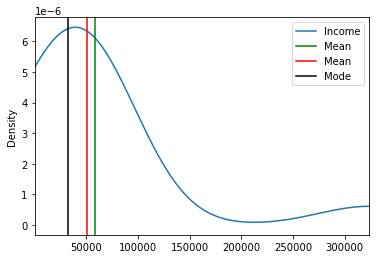

In [3]:
income.plot.kde(xlim = (income.min(),income.max()),label = "Income")

plt.axvline(income.mean(), color = "green",label="Mean")
plt.axvline(income.median(), color = "red",label="Mean")
plt.axvline(income.mode().mean(), color = "black",label="Mode")

plt.legend()
plt.show()

In [4]:
marks = pd.Series([10,50,28,50,50,58,60,59,60,57,60])
marks
marks.min()

10

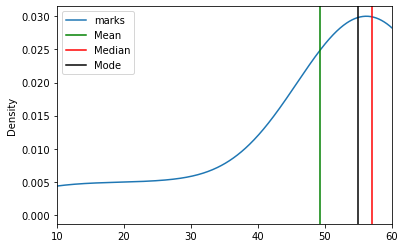

In [5]:
marks.plot.kde(xlim = (10,60),label = "marks")

plt.axvline(marks.mean(), color = "green",label="Mean")
plt.axvline(marks.median(), color = "red",label="Median")
plt.axvline(marks.mode().mean(), color = "black",label="Mode")

plt.legend()
plt.show()

# QQ PLOT FOR LONG TAILED

In [11]:
nflx=marks.copy()
from scipy import stats

((array([-1.49876728, -0.98494667, -0.64703803, -0.37109819, -0.12121409,
          0.12121409,  0.37109819,  0.64703803,  0.98494667,  1.49876728]),
  array([-0.5798185 , -0.05129329, -0.01680712,  0.        ,  0.01680712,
          0.03390155,  0.05129329,  0.14842001,  0.5798185 ,  1.60943791])),
 (0.5321221143188325, 0.17917594692280545, 0.8497230160365037))

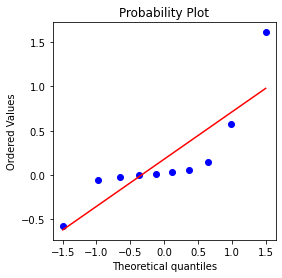

In [12]:
marks = pd.Series([10,50,28,50,50,58,60,59,60,57,60])
marks
marks.min()
nflx = np.diff(np.log(nflx[nflx>0]))
fig, ax = plt.subplots(figsize=(4, 4))
stats.probplot(nflx, plot=ax)


##### Shows extreme values ,which tells that it do not follows normal distribution as it is not following the linear line

## EXPLAINATION AND OTHER DISTRIBUTIONS FOR LONG TAILED

There is no specific formula for generating random numbers from a long-tailed distribution, as the exact form of the distribution depends on the specific situation. However, there are many common distributions that have long tails, such as the Pareto distribution, the power-law distribution, and the lognormal distribution. In general, generating random numbers from a long-tailed distribution requires a more sophisticated approach than generating numbers from a normal distribution, due to the heavier tails and potentially infinite variance.

generating random numbers from a Pareto distribution with shape parameter α and minimum value xmin using Python's numpy library:

formula for pareto f(x; α, xmin) = α * xmin^α / x^(α+1)

where x is the random variable, α is the shape parameter, and xmin is the minimum value. This distribution has a power-law tail that decays as x^(-α-1). However, other long-tailed distributions may have different forms and require different approaches for generating random numbers.




### PARETO

In [13]:
import numpy as np

alpha = 2.0
xmin = 1.0
size = 1000

# Generate random numbers from Pareto distribution
pareto = np.random.pareto(alpha, size) + xmin

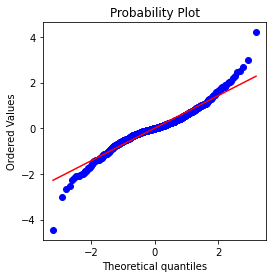

In [17]:
nflx=pd.Series(pareto)
nflx = np.diff(np.log(nflx[nflx>0]))
fig, ax = plt.subplots(figsize=(4, 4))
val=stats.probplot(nflx, plot=ax)


#### LOGNORMAL

In [31]:

import numpy as np

mu = 40
sigma = 140
size = 1000

# Generate random numbers from lognormal distribution
lognormal = np.random.lognormal(mu, sigma, size)


In this code, we use the numpy.random.lognormal function to generate size random numbers from a lognormal distribution with mean mu and standard deviation sigma. The resulting lognormal array will contain size random numbers from the lognormal distribution.




exact formula for the lognormal distribution is:


f(x; μ, σ) = 1 / (x σ sqrt(2π)) * exp(-(ln(x)-μ)^2 / (2σ^2))
where x is the random variable, μ is the mean of the logarithm of x, σ is the standard deviation of the logarithm of x. This distribution has a long right tail, and its shape can vary greatly depending on the values of μ and σ. However, the numpy.random.lognormal function makes it easy to generate random numbers from this distribution in Python.





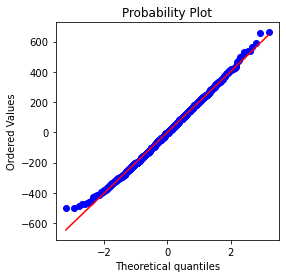

In [32]:
nflx=pd.Series(lognormal)
nflx = np.diff(np.log(nflx[nflx>0]))
fig, ax = plt.subplots(figsize=(4, 4))
val=stats.probplot(nflx, plot=ax)
